# INSAID ML3 ADVANCED TERM PROJECT
## GHOULS, GHOSTS AND GOBLINS CLASSIFICATION DATASET



<img src =  'https://github.com/padmapriyajain/Image_Dictionary/blob/master/GGG.png?raw=true' width="1100" height="250">



# Table of Contents

1. [INTRODUCTION](#section1) <br>
  - 1.1 [PROBLEM STATEMENT](#section101)<br>
  - 1.2 [IMPORT LIBRARIES AND DATA](#section102)<br>
2. [DATA DESCRIPTION](#section2) <br>
3. [EXPLORATORY DATA ANALYSIS](#section3)<br>
4. [FEATURE ENGINEERING](#section4)<br>
5. [MODEL PREDICTIONS](#section5)<br>
  - 5.1 [IMPORT LIBRARIES FOR PREDICTION](#section501)
  - 5.2 [PREDICTION WITH BASELINE MODEL](#section502)
  - 5.3 [PREDICTION WITH BEST PARAMETERS ON BASELINE MODELS](#section501)
    - 5.3.1 [RANDOM FOREST WITH RANDOMIZED SEARCH](#section50301)
    - 5.3.2 [KNN WITH BEST K VALUE](#section50302)
    - 5.3.3 [STOCHASTIC GRADIENT DESCENT WITH GRID SEARCHCV](#section50303)
    - 5.3.4 [GRADIENT BOOSTING CLASSIFIER WITH RANDOMIZED SEARCHCV](#section50304)
    - 5.3.5 [LOGISTIC REGRESSION WITH BEST PARAMETER](#section50305)
    - 5.3.6 [SUPPORT VECTOR CLASSIFIER WITH GRID SEARCHCV](#section50306)
    - 5.3.7 [VOTING CLASSIFIER](#section50307)
6. [CONCLUSION AND FUTURE PREDICTION](#section6)<br>

<a id='section1'></a>
# 1. INTRODUCTION:

I am M Padmapriya, student of Jan 2020 cohort. I am presenting the GHOULS dataset for my ML ADVANCED project.

<a id=section101></a> 
## 1.1 PROBLEM STATEMENT

* This dataset has the scientific observations and measurements of halloween creatures like Ghouls, Ghosts and Goblins.

* The intention of learning is to distinguish and classify them by their bone length measurements, severity of rot, extent of soullessness, and other characteristics. 

* We should be able to identify the type of halloween based on the characteristics in the test data.

* All the classifier models learnt till ML3, along with optimization techniques should be applied as part of this project.

<a id=section102></a> 
## 1.2 IMPORT LIBRARIES AND DATA

In [55]:
                                                                       # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                   
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all' 

import warnings                                                                  # Ignore warning related to pandas_profiling                                      
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                        # Display all dataframe columns in outputs
                                                                                 # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

#library
import sys
import pandas as pd
import numpy as np
import random as rnd
%matplotlib inline

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
from pandas.plotting import scatter_matrix

# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV                              

In [84]:
# Load the dataset in to halloween dataframe

df_hal_train = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_train.csv")
df_hal_test = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-4/master/Projects/Ghouls_test.csv")

<a id='section2'></a> 
# 2. DATA DESCRIPTION

In [57]:
# Sample of halloween train data
df_hal_train.sample(5)

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
259,630,0.476320,0.286226,0.488843,0.411461,clear,Goblin
321,756,0.187781,0.736491,0.344348,0.346306,clear,Ghost
286,693,0.468841,0.517418,0.620956,0.624848,clear,Goblin
307,733,0.521237,0.608728,0.946612,0.676993,white,Ghoul
346,836,0.346283,0.158742,0.714987,0.322676,white,Goblin


In [58]:
# Sample of halloween test data
df_hal_test.sample(5)

,id,bone_length,rotting_flesh,hair_length,has_soul,color
320,535,0.326442,0.936041,0.352307,0.538078,clear
85,152,0.385390,0.531998,0.159234,0.254646,clear
360,613,0.282410,0.318677,0.460365,0.540802,blue
343,576,0.506012,0.153566,0.446913,0.512833,green
147,255,0.329971,0.362024,0.449953,0.235233,black


In [59]:
# Info and describe the halloween data
df_hal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [60]:
df_hal_train.describe(include= 'all')

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371,371
unique,NaN,NaN,NaN,NaN,NaN,6,3
top,NaN,NaN,NaN,NaN,NaN,white,Ghoul
freq,NaN,NaN,NaN,NaN,NaN,137,129
mean,443.676550,0.434160,0.506848,0.529114,0.471392,NaN,NaN
std,263.222489,0.132833,0.146358,0.169902,0.176129,NaN,NaN
min,0.000000,0.061032,0.095687,0.134600,0.009402,NaN,NaN
25%,205.500000,0.340006,0.414812,0.407428,0.348002,NaN,NaN
50%,458.000000,0.434891,0.501552,0.538642,0.466372,NaN,NaN
75%,678.500000,0.517223,0.603977,0.647244,0.600610,NaN,NaN


In [61]:
print("Types:", df_hal_train.type.unique())
print("Color:", df_hal_train.color.unique())

Types: ['Ghoul' 'Goblin' 'Ghost']
Color: ['clear' 'green' 'black' 'white' 'blue' 'blood']


OBSERVATIONS:

  * There are 371 character observations.
  * There are 7 features (1 int, 4 float and 2 object type features)
    1. ID : Appears to be the identification number of the monster in question
    2. Bone Length : Average length of the bones in the creature.
    3. Rotting Flesh : Percentage of flesh on the creature that is rotting
    4. Hair Length : Average length of the hair on the creature.
    5. Has Soul : The percentage of a soul present in the creature
    6. Color : The color of the creature
    7. Type : The category of the creature (i.e. ghoul, goblin or ghost)
  * There are no missing values
  * There are 3 unique types of halloweens "GHOUL", "GOBLIN" and "GHOST"112
  * There are 6 unique colors "CLEAR", "GREEN", "BLACK", "WHITE", "BLUE", "BLOOD"

ACTIONS:

  * ID feature should be removed, since it doesnt add any value to the classification.
  * COLOR and TYPE has to be encoded and converted to numerical values.


<a id='section3'></a> 
# 3. EXPLORATORY DATA ANALYSIS

1. How many are identified as GHOULS, GHOSTS and GOBLINS?

* We see that the Ghouls are more than the other 2 types.

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

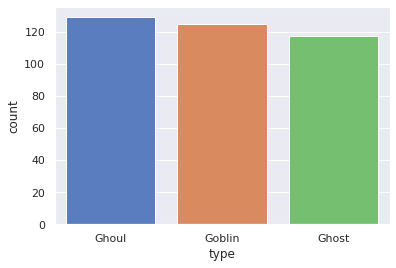

In [86]:
sns.countplot(df_hal_train.type)
df_hal_train.type.value_counts()

2. How many color variations are there in the dataset?

* We see that white and clear/transparent colored halloweens are more as per the dataset.

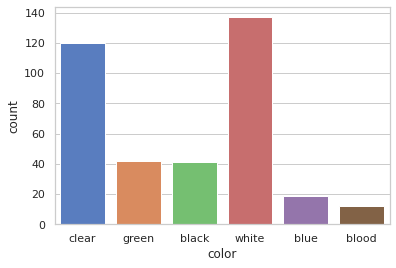

In [63]:
sns.countplot(df_hal_train.color);

3. What is the predominant colour of the Halloweens?

We see that Ghouls and Ghosts are mostly white in colour and Goblins are mostly transparent or clear.

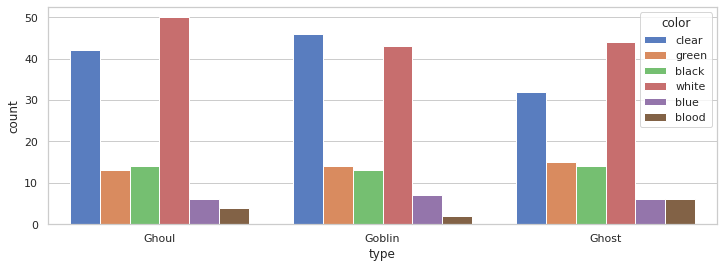

In [64]:
fig = plt.figure(figsize=(12,4))
sns.countplot(df_hal_train.type, hue = df_hal_train.color);

4. What is the distribution of values of all features?

We see that all the features are almost normally distributed.


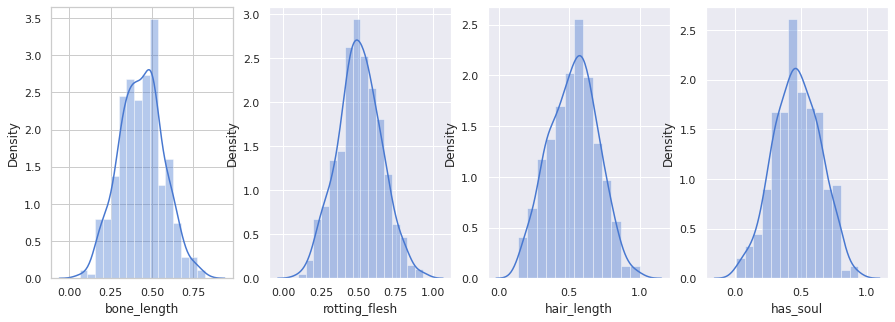

In [65]:
fig, ax = plt.subplots(1, 4,figsize=(15,5))
plt.subplot(1,4,1)
sns.set(color_codes=True)                                                
sns.set_palette(sns.color_palette("muted"));
sns.distplot(df_hal_train["bone_length"])
plt.subplot(1,4,2)
sns.set(color_codes=True)                                                
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_hal_train['rotting_flesh']);
plt.subplot(1,4,3)
sns.set(color_codes=True)                                                
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_hal_train['hair_length']);
plt.subplot(1,4,4)
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot(df_hal_train['has_soul']);

5. What is the correlation of all the features?

   We get the following observations from heat map:

    * Rotting flesh feature is neagatively correlated with all the other features.
    * Has soul is more correlated with the hair length.

  Since none of the features are very highly correlated, there is no need to drop any columns.



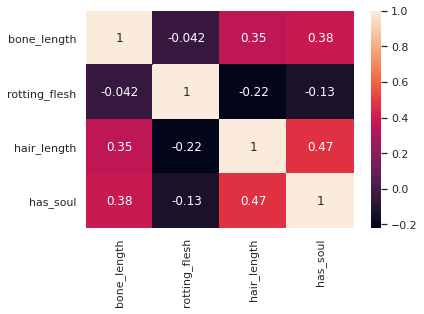

In [66]:
sns.heatmap(df_hal_train.drop('id', axis = 1).corr(), annot = True);

6. What is the variation of each characteristic feature with that of halloween type?

1. BoneLength and Halloween Type

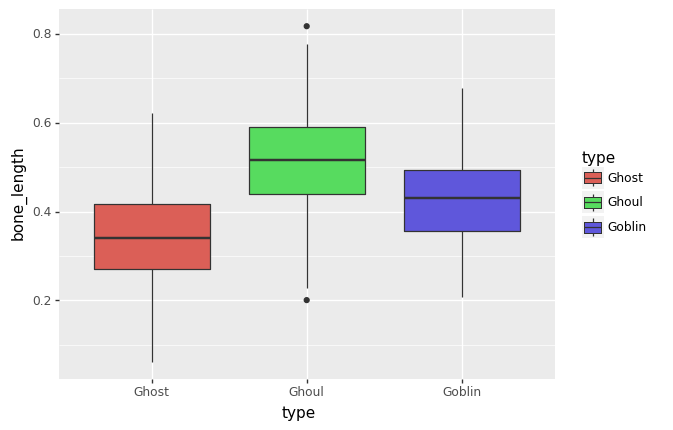

<ggplot: (8779248234941)>

In [67]:
from plotnine import ggplot, aes, geom_boxplot
ggplot(df_hal_train) + aes(x="type", y="bone_length", fill = "type") + geom_boxplot()

We see that:
  1. All Ghouls have higher bone length compared to ghosts.
  2. Approx 50 percentile of Goblins have less bone length compared to Ghouls.
  3. And 50 percentile of Goblins have bone length similar to that of Ghouls, this area of prediction will be tricky.

2. Hairlength and Halloween Type

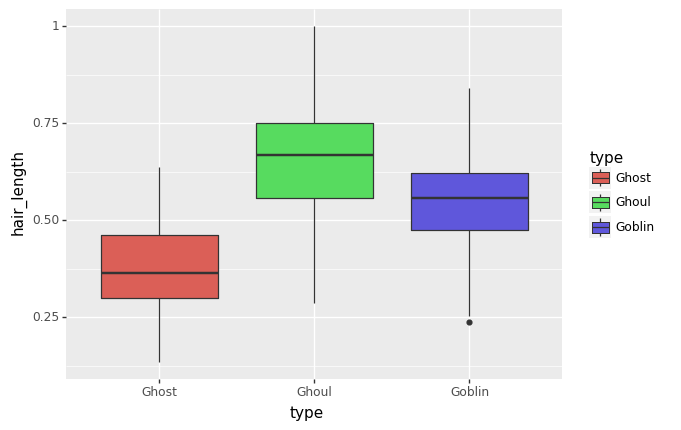

<ggplot: (8779248228241)>

In [68]:
ggplot(df_hal_train) + aes(x="type", y="hair_length", fill = "type") + geom_boxplot()

We see that:
  1. All the Ghouls have more hair length when compared to Ghosts.
  2. Approximately 50 percentile of Goblins have less hair compared to Ghouls.
  3. And 50percentile of Goblins have hairlength similar to Ghouls. So differentiating this 50% between them is going to be tricky.


3. Rotting Flesh and Halloween Type

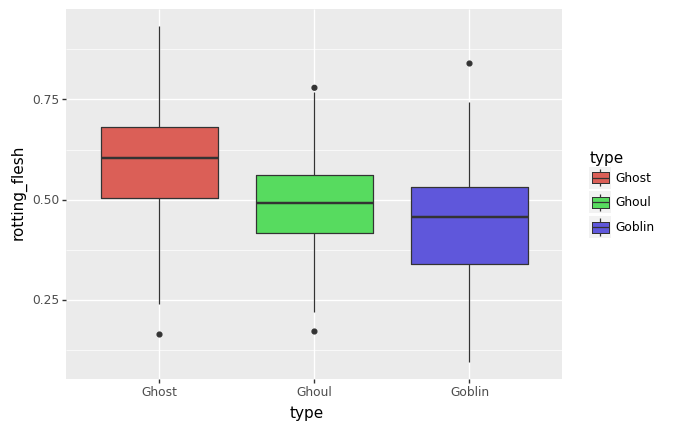

<ggplot: (8779248292365)>

In [69]:
ggplot(df_hal_train) + aes(x="type", y="rotting_flesh", fill = "type") + geom_boxplot()

We see that:
  1. Ghosts have more rotting flesh when compared to Goblins
  2. Approx 50% ofGhouls have less rotting flesh than all Ghosts.
  3. Goblins have less rotting flesh when compared all.

<a id='section4'></a> 
# 4 Feature Engineering

1. Encoding the colour feature in both train, test and dropping the "Id" feature.

In [70]:
df_hal_test = pd.concat([df_hal_test, pd.get_dummies(df_hal_test.color, prefix="color", drop_first = True)], axis=1)
df_hal_train = pd.concat([df_hal_train, pd.get_dummies(df_hal_train.color, prefix="color", drop_first = True)], axis=1)
df_hal_train.drop(['color','id'], axis=1, inplace=True)
df_hal_test.drop(['color','id'], axis=1, inplace=True)

In [71]:
print("Train:", df_hal_train.shape)
print("Test:", df_hal_test.shape)

Train: (371, 10)
Test: (529, 9)


2. Encoding the type feature in train dataset

In [72]:
df_hal_train['type'] = df_hal_train['type'].replace(['Ghoul', 'Goblin', 'Ghost'], [1, 2, 3])

df_hal_train.sample(5)

,bone_length,rotting_flesh,hair_length,has_soul,type,color_blood,color_blue,color_clear,color_green,color_white
32,0.554510,0.630669,0.592484,0.615364,2,0,0,0,0,1
349,0.502599,0.604174,0.617955,0.593545,1,0,0,1,0,0
114,0.489132,0.481304,0.482691,0.460081,2,0,0,0,0,1
195,0.367419,0.575229,0.474942,0.448402,1,0,0,0,0,1
237,0.523789,0.657317,0.818979,0.624504,1,0,0,0,0,1


3. Define the X (Independent) and Y (Target variable).


In [73]:
y = df_hal_train['type']
X = df_hal_train.drop(['type'], axis = 1)

4. Split the data into train and test for learning and testing the model.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 42, stratify = y)

In [75]:
X_train.shape
X_test.shape

(296, 9)

(75, 9)

<a id='section6'></a>
# 5. MODEL PREDICTIONS

The Target variable "type" is a multiclass variable, hence its a classification dataset where in we need to find if the halloween is a GHOUL or GHOST or GOBLIN. The algorithms which I will be applying for this dataset are listed below:
  1. Logistic Regression (Baseline, GridSearchCV)
  2. Decision Tree Classifier (Baseline, GridSearchCV)
  3. Random Forest Classifier (Baseline, RandomizedSearchCV)
  4. K - Nearest Neighbour (Baseline, Best K)
  5. Gaussian Naive Bayes
  6. Support Vector Classifier (Baseline, Grid SearchCV)
  7. Linear Discriminant Analysis
  8. Bagging Classifier
  9. Gradient Boosting Classifier (Baseline, GridSearchCV)
  10. AdaBoost Classifer
  11. Voting Classifer

The different metrics which we have for validating the classifier models are:
  1. Confusion Matrix
  2. Accuracy
  3. Recall
  4. Precision
  5. F1 Score

In this dataset we are trying to classify a message as GHOUL - 1, GOBLIN - 2, GHOST - 3

1. Accuracy : (TP + TN)/ (TP + TN + FP + FN)  
   How many halloweens where correctly classified??
2. Recall/Sensitivity: TP/ (TP + FN)  
   How many Ghouls, Ghosts and Goblins where correctly predicted out of the total Ghouls, Ghosts and Goblins respectively?
3. Precision: TP/(TP + FP)  
   How many Ghouls, Ghosts and Goblins where individually and correctly predicted out of total predictions?
4. F1 Score: 2.Precision * Recall/ (Precision + Recall)
   Weighted average of True positives and True negatives.

So, in the modelling, we need to make sure that the accuracy and f1 score are high.

<a id=section501></a>
## 5.1 Import required libraries for predictions

In [76]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

<a id=section502></a>
## 5.2 Baseline Model Selection

In [77]:
def run_model(model, X_train, y_train, X_test, y_test, model_metrics):
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model)
    return(scores)

In [78]:
def get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model):
    accuracy_test = accuracy_score(y_test, y_pred_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    f1score_test = f1_score(y_test,y_pred_test, average= 'weighted')
    f1score_train = f1_score(y_train,y_pred_train, average = 'weighted')
    new_row = {'model': type(model).__name__, 'accuracy_test': accuracy_test, 'accuracy_train': accuracy_train, 'f1score_test' : f1score_test, 'f1score_train':f1score_train}
    model_metrics = model_metrics.append(new_row, ignore_index=True)
    return(model_metrics)

In [79]:
def run_grid_model(model, grid, X_train, y_train, X_test, y_test,model_metrics):
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100, cv = 5, n_jobs = -1, verbose= 3)
    # Fit the random search model
    rf_random.fit(X_train, y_train)
    print(f"Best params of the randomized searchcv model is : {rf_random.best_params_} \n-----------------------------------")
    y_pred_test = rf_random.predict(X_test)
    y_pred_train = rf_random.predict(X_train)
    scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics,model)
    return(scores)

In [80]:
models = [
    LogisticRegression(random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(probability=True, random_state=42),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(random_state=50),
    BaggingClassifier(random_state = 42)
] 
print ("This is base model experiementation to decide benchmark models")
data = {'model': [], 'accuracy_test': [], 'accuracy_train':[], 'f1score_test': [], 'f1score_train': []}
model_metrics = pd.DataFrame(data)
i=0
for eachModel in models:
  model_metrics = run_model(eachModel,X_train, y_train, X_test, y_test, model_metrics)

model_metrics

This is base model experiementation to decide benchmark models


,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


As we see that, the following models are performing close and have higher accuracy:
1. SGDClassifer - 77.33%
2. KNeighboursClassifer - 76%
3. Logistic Regression - 74.67%
4. SVC - 74.67%

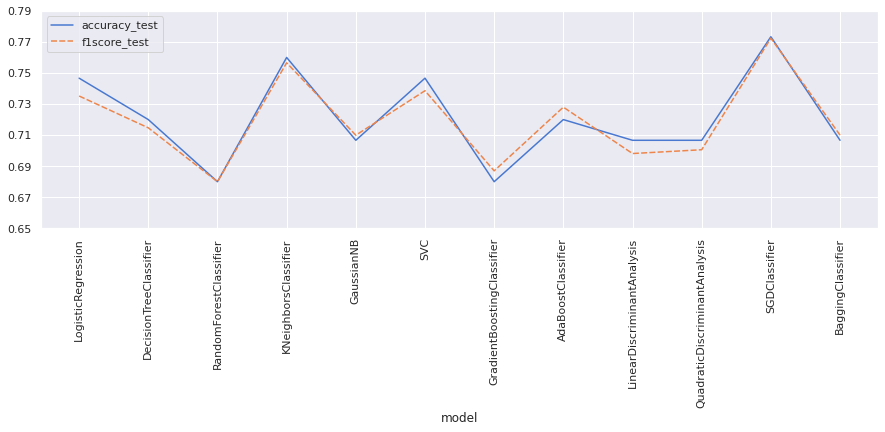

In [81]:
df_test = model_metrics.iloc[:,[0,1,3]].copy()
df_test.set_index('model', inplace=True)
plt.figure(figsize=(15,4))
sns.lineplot(data = df_test)
plt.yticks(np.arange(0.65, 0.79, step=0.02))
plt.xticks(rotation=90)
plt.legend(loc = 'upper_center')
plt.show();

<a id=section503></a>
## 5.3 Best paramaterized baseline models



<a id=section50301></a>
### 5.3.1 Randomized Search for Random Forest Model

In [82]:
# Create the random grid
random_grid = {'n_estimators': [10,50, 100],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,30,50, 70],
               'min_samples_split': [2,5,7],
               'min_samples_leaf': [2,5,7],
               'bootstrap': [True,False],
               'criterion': ['gini', 'entropy']}

In [29]:
model_metrics = run_grid_model(RandomForestClassifier(random_state = 42),random_grid, X_train, y_train, X_test, y_test, model_metrics)
model_metrics

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 386 tasks      | elapsed:   29.7s


Best params of the randomized searchcv model is : {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True} 
-----------------------------------


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   38.3s finished


,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [30]:
rf_best = RandomForestClassifier(random_state = 42, n_estimators= 50, min_samples_split= 2, min_samples_leaf= 5, max_features= 'sqrt', max_depth= 30, criterion= 'entropy', bootstrap=True)
model_metrics.loc[12,"model"] = "RandomForest_RandomizedSearchCV" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50302></a>
### 5.3.2 Best K for KNearest Neighbour Model

In [31]:
from sklearn.model_selection import cross_val_score
# creating list of K for KNN
k_list = list(range(4,20,1))
# creating list of cv scores
cv_scores = []
# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

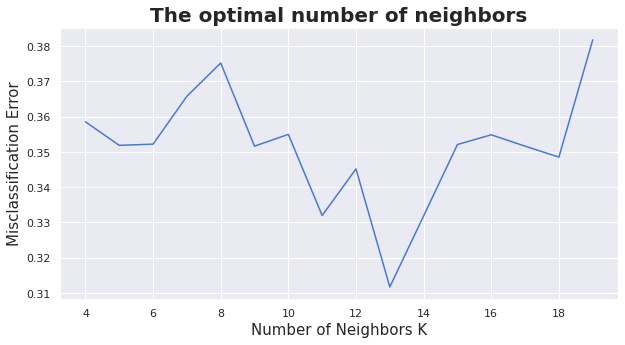

In [32]:
# changing to misclassification error
pre = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(10,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, pre);
plt.show();

In [33]:
knn_best = KNeighborsClassifier(n_neighbors=5)
knn_best.fit(X_train, y_train)
y_pred_test = knn_best.predict(X_test)
y_pred_train = knn_best.predict(X_train)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, knn_best)
model_metrics

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [34]:
model_metrics.loc[13,"model"] = "KNeighbors_K_5" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50303></a>
### 5.3.3 Grid Search CV on Stochastic Gradient Classifer

In [35]:
params = {"alpha": [1e-4,3e-4,7e-4,1e-3,3e-3,7e-3,1e-2], "max_iter": list(range(1,51))}
model = SGDClassifier(loss = 'log', random_state= 50)
sgd = GridSearchCV(model,param_grid = params, scoring = 'accuracy', cv = 10)
sgd.fit(X_train,y_train)
print('Best score: {}'.format(sgd.best_score_))
print('Best parameters: {}'.format(sgd.best_params_))

GridSearchCV(cv=10, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=50,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0003, 0.0007, 0.001, 0.003, 0.007,
                                   0.01],
                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
         

Best score: 0.7326436781609196
Best parameters: {'alpha': 0.0001, 'max_iter': 37}


In [36]:
%%time
sgd_best = SGDClassifier(alpha=0.0001,loss='log', max_iter=37,random_state=50)
sgd_best.fit(X_train, y_train)
y_pred_train = sgd_best.predict(X_train)
y_pred_test = sgd_best.predict(X_test)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, sgd_best)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 15.4 ms


In [37]:
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [38]:
model_metrics.loc[14,"model"] = "SGDClassifier_GridSearchCV" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50304></a>
### 5.3.4 Randomized Search on GradientBoosting Classifier

In [39]:
grid = {'learning_rate':[0.05, 0.1, 0.5], 'n_estimators':[100, 200, 500], 'max_depth':[2, 3, 5, 10]}
model = GradientBoostingClassifier(random_state = 42)
gbc = RandomizedSearchCV(estimator = model, param_distributions = grid, n_iter = 100, cv = 5, n_jobs = -1, verbose= 3)
gbc.fit(X_train, y_train)
print('Best score: {}'.format(gbc.best_score_))
print('Best parameters: {}'.format(gbc.best_params_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

Best score: 0.7264406779661017
Best parameters: {'n_estimators': 100, 'max_depth': 2, 'learning_rate': 0.05}


In [40]:
gbc_best =  GradientBoostingClassifier(n_estimators =  100, max_depth = 2, learning_rate = 0.05, random_state=42)
gbc_best.fit(X_train, y_train)
y_pred_train = gbc_best.predict(X_train)
y_pred_test = gbc_best.predict(X_test)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, gbc_best)
model_metrics

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [41]:
model_metrics.loc[15,"model"] = "GradientBoosting_GridSearchCV" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50305></a>
### 5.3.5 Best parameter for Logistic Regression

In [42]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
model = LogisticRegression(random_state = 42)
lr = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
lr.fit(X_train, y_train)
print('Best score: {}'.format(lr.best_score_))
print('Best parameters: {}'.format(lr.best_params_))

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 5, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Best score: 0.7228813559322033
Best parameters: {'C': 10, 'penalty': 'l2'}


In [43]:
lr_best = LogisticRegression(random_state = 42, C = 10, penalty = 'l2')
lr_best.fit(X_train, y_train)
y_pred_train = lr_best.predict(X_train)
y_pred_test = lr_best.predict(X_test)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, lr_best)
model_metrics

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [44]:
model_metrics.loc[16,"model"] = "LogisticRegression_GridSearchCV" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50306></a>
### 5.3.6 Grid Search CV on Support Vector Classifier

In [45]:
params = {'kernel':['linear', 'rbf'], 'C':[1, 3, 5, 10], 'degree':[3, 5, 10]}
model = SVC(probability = True, random_state = 42)
svc = GridSearchCV(model, param_grid = params, cv = 5, n_jobs = -1)
svc.fit(X_train, y_train)
print('Best score: {}'.format(svc.best_score_))
print('Best parameters: {}'.format(svc.best_params_))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 3, 5, 10], 'degree': [3, 5, 10],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Best score: 0.7161016949152541
Best parameters: {'C': 10, 'degree': 3, 'kernel': 'linear'}


In [46]:
%%time
svc_best = SVC(C = 10, degree = 3, kernel = 'linear', probability = True, random_state = 42)
svc_best.fit(X_train, y_train)
y_pred_train = svc_best.predict(X_train)
y_pred_test = svc_best.predict(X_test)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, svc_best)

CPU times: user 19.9 ms, sys: 0 ns, total: 19.9 ms
Wall time: 22.8 ms


In [47]:
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


In [48]:
model_metrics.loc[17,"model"] = "SVC_GridSearchCV" 
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


<a id=section50307></a>
### 5.3.7 Voting Classifier

In [49]:
%%time
voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('knn', knn_best), ('sgd', sgd_best), ('lr', lr_best), ('svc', svc_best)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)
model_metrics = get_metrics(y_train,y_pred_train,y_test,y_pred_test,model_metrics, voting_clf)

CPU times: user 178 ms, sys: 1.06 ms, total: 179 ms
Wall time: 184 ms


In [50]:
model_metrics

,model,accuracy_test,accuracy_train,f1score_test,f1score_train
0,LogisticRegression,0.746667,0.763514,0.735185,0.758397
1,DecisionTreeClassifier,0.720000,1.000000,0.714698,1.000000
2,RandomForestClassifier,0.680000,1.000000,0.680000,1.000000
3,KNeighborsClassifier,0.760000,0.777027,0.756543,0.780100
4,GaussianNB,0.706667,0.756757,0.709943,0.761007
5,SVC,0.746667,0.787162,0.738579,0.784676
6,GradientBoostingClassifier,0.680000,1.000000,0.687003,1.000000
7,AdaBoostClassifier,0.720000,0.743243,0.727999,0.745722
8,LinearDiscriminantAnalysis,0.706667,0.750000,0.698140,0.750392
9,QuadraticDiscriminantAnalysis,0.706667,0.783784,0.700580,0.785108


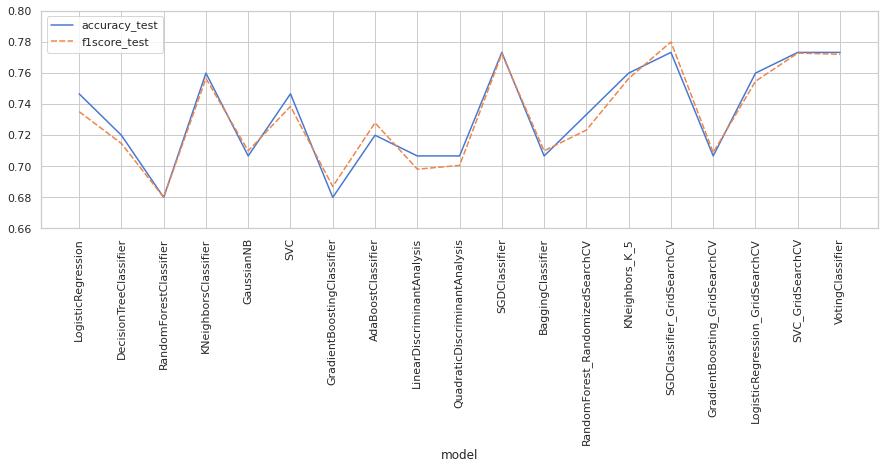

In [51]:
df_test = model_metrics.iloc[:,[0,1,3]].copy()
df_test.set_index('model', inplace=True)
plt.figure(figsize=(15,4))
sns.lineplot(data = df_test)
plt.yticks(np.arange(0.66, 0.80, step=0.02))
plt.xticks(rotation=90)
plt.legend(loc = 'upper_center')
plt.show();

As we see here, the accuracy for the below models are almost close:

1. SGD Classifier with Grid Search
2. SVC Classifier with Grid Search
3. Voting Classifier

Lets compare there performance w.r.t time taken:

1. Stochastic Gradient Descent Classifer with Grid Search - 18.3ms
2. Support Vector Classifier with Grid Search - 26.3ms
3. Voting Classifier - 174ms

We see that Stochastic Gradient Descent gives a high accuracy and less execution time.

<a id=section6></a>
## 6. CONCLUSION AND FUTURE HALLOWEEN PREDICTION

Hereby we conclude that, STOCHASTIC GRADIENT DESCENT CLASSIFIER with best parameters arrived by Grid Search can be proposed for future halloween prediction. It gives a accuracy score of 77.34% and takes a time of about 18.3ms

In [52]:
df_hal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bone_length    529 non-null    float64
 1   rotting_flesh  529 non-null    float64
 2   hair_length    529 non-null    float64
 3   has_soul       529 non-null    float64
 4   color_blood    529 non-null    uint8  
 5   color_blue     529 non-null    uint8  
 6   color_clear    529 non-null    uint8  
 7   color_green    529 non-null    uint8  
 8   color_white    529 non-null    uint8  
dtypes: float64(4), uint8(5)
memory usage: 19.2 KB


In [53]:
X_test_A = df_hal_test # Actual test case given
sgd_best.fit(X_train, y_train)
y_pred_test_A = sgd_best.predict(X_test_A)
df_hal_test['type'] = y_pred_test_A
df_hal_test['type'] = df_hal_test['type'].replace([1, 2, 3], ['Ghoul', 'Goblin', 'Ghost'])
df_hal_test

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=37,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=50, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

,bone_length,rotting_flesh,hair_length,has_soul,color_blood,color_blue,color_clear,color_green,color_white,type
0,0.471774,0.387937,0.706087,0.698537,0,0,0,0,0,Ghoul
1,0.427332,0.645024,0.565558,0.451462,0,0,0,0,1,Goblin
2,0.549602,0.491931,0.660387,0.449809,0,0,0,0,0,Ghoul
3,0.638095,0.682867,0.471409,0.356924,0,0,0,0,1,Goblin
4,0.361762,0.583997,0.377256,0.276364,0,0,0,0,0,Ghost
...,...,...,...,...,...,...,...,...,...,...
524,0.377573,0.390158,0.696465,0.355373,0,1,0,0,0,Goblin
525,0.229161,0.601265,0.191282,0.475115,0,0,1,0,0,Ghost
526,0.510497,0.498347,0.708020,0.714154,0,0,0,0,1,Ghoul
527,0.331472,0.765835,0.338207,0.193431,0,0,1,0,0,Ghost


In [54]:
df_hal_test.to_csv('prediction.csv') 